### Ridge Regression on 2D

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=30)

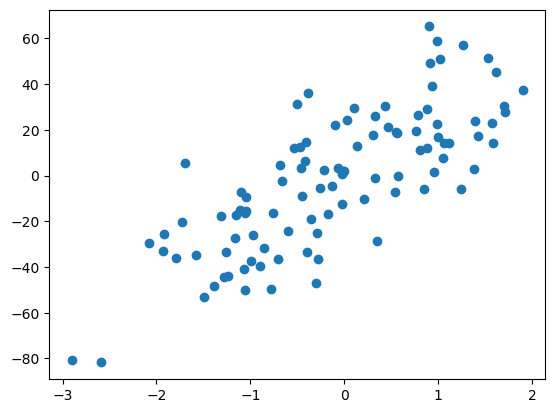

In [3]:
plt.scatter(X, y)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr = LinearRegression()
lr.fit(X, y)
print(lr.coef_)
print(lr.intercept_)

[21.83015155]
0.5639549829104511


In [6]:
from sklearn.linear_model import Ridge

In [7]:
r_model = Ridge(alpha=10)
r_model.fit(X, y)
print(r_model.coef_)
print(r_model.intercept_)

[20.05506248]
0.36799905285195367


In [8]:
r_model_1 = Ridge(alpha=100)
r_model_1.fit(X, y)
print(r_model_1.coef_)
print(r_model_1.intercept_)

[11.58032047]
-0.5675460885470096


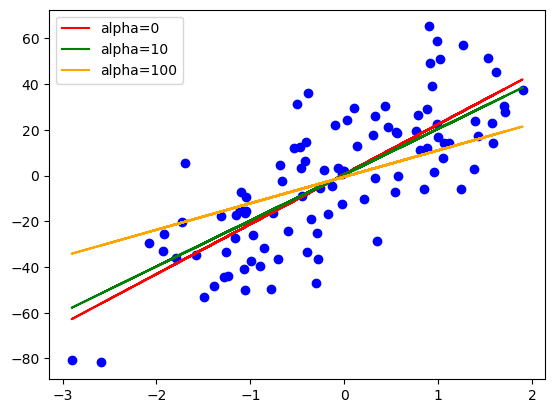

In [14]:
# plot all lines
plt.scatter(X, y, color='blue')
plt.plot(X, lr.predict(X), color='red', label='alpha=0')
plt.plot(X, r_model.predict(X), color='green', label='alpha=10')
plt.plot(X, r_model_1.predict(X), color='orange', label='alpha=100')
plt.legend()

In [31]:
class MyRidge:
    def __init__(self, alpha=0.1):
        
        self.alpha=alpha
        self.m = None
        self.b = None 

    def fit(self, X_train, y_train):
        numerator = 0
        denumerator = 0

        for i in range(X_train.shape[0]):
            numerator = numerator + (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
            denumerator = denumerator + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()) 

        self.m = numerator/(denumerator + self.alpha)
        self.b = y_train.mean() - (self.m*X_train.mean())
        print(self.m, self.b)

    def predict(X_test):
        pass

In [34]:
ridge_M = MyRidge(alpha=100)

In [35]:
ridge_M.fit(X, y)

[11.58032047] [-0.56754609]


## Ridge Regression for nD data

In [37]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [41]:
X, y = load_diabetes(return_X_y=True)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [44]:
from sklearn.linear_model import Ridge

In [45]:
ridge_m = Ridge(alpha=0.1, solver='cholesky')

In [46]:
ridge_m.fit(X_train, y_train)

Ridge(alpha=0.1, solver='cholesky')

In [48]:
y_pred = ridge_m.predict(X_test)

In [50]:
r2_score(y_test, y_pred)

0.46931288533098037

In [52]:
print(ridge_m.coef_)
print(ridge_m.intercept_)

[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


In [70]:

class ApnaRidge:

    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.coef_ = None

    def fit(self, X_train, y_train):
        # Add a column of ones for the intercept
        X_train = np.insert(X_train, 0, 1, axis=1)

        # Create identity matrix for regularization
        I = np.identity(X_train.shape[1])
        I[0, 0] = 0  # Do not regularize the intercept

        # Compute weights using Ridge Regression formula
        weights = np.linalg.inv(X_train.T @ X_train + self.alpha * I) @ X_train.T @ y_train

        # Extract intercept and coefficients
        self.coef_ = weights

    def predict(self, X_test):
        # Add a column of ones for the intercept
        X_test = np.insert(X_test, 0, 1, axis=1)
        return X_test @ self.coef_


In [71]:
ridge_m = ApnaRidge(alpha=10)
ridge_m.fit(X_train, y_train)
y_pred = ridge_m.predict(X_test)
print("R^2 Score:", r2_score(y_test, y_pred))
print("Coefficients:", ridge_m.coef_)


R^2 Score: 0.15865507300310033
Coefficients: [151.60854822  19.73816861  -2.31650264  62.15929363  49.54602923
  18.92716443  12.45739602 -39.60091202  42.81978891  61.57115822
  35.24731451]


In [54]:
X_train
np.insert(X_train, 0, 1, axis=1)

array([[ 1.        ,  0.0090156 , -0.04464164, ...,  0.02323852,
         0.05568623,  0.10661708],
       [ 1.        ,  0.03081083,  0.05068012, ...,  0.05755657,
         0.0354587 ,  0.08590655],
       [ 1.        ,  0.01628068, -0.04464164, ..., -0.03949338,
        -0.05947118, -0.06735141],
       ...,
       [ 1.        ,  0.04170844,  0.05068012, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [ 1.        ,  0.01628068,  0.05068012, ..., -0.03949338,
         0.01703607,  0.00720652],
       [ 1.        ,  0.04897352,  0.05068012, ...,  0.07120998,
         0.03243232,  0.04862759]])